## Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
import math

## Importing dataset

In [2]:
data=pd.read_csv("DiamondsPrices.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# x dimension in millimetres
# y dimension in millimetres
# z dimension in millimetres

## Shape of Dataset

In [5]:
data.shape

(53940, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
data.value_counts().sum()

53940

## Statistical values of the data

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

# Data Cleaning ->

### Outlier removal of Carat column =>

<AxesSubplot:xlabel='carat'>

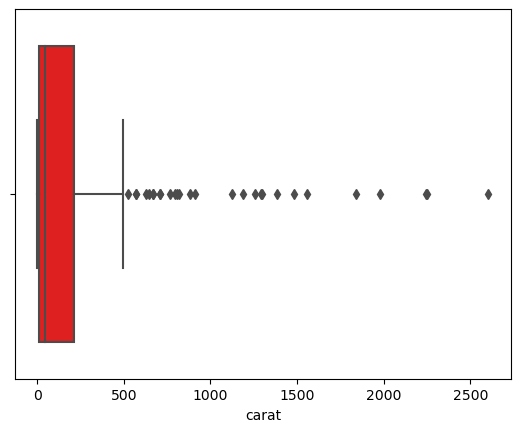

In [12]:
sns.boxplot(data.carat.value_counts(),color="red") # may have outliers values

In [13]:
data["carat"].quantile([0.95,0.96,0.97,0.98,0.99,0.999,1]) # outliers after 999 %

0.950    1.70
0.960    1.98
0.970    2.01
0.980    2.04
0.990    2.18
0.999    2.68
1.000    5.01
Name: carat, dtype: float64

In [14]:
min_thresold=data["carat"].quantile(0.999)

In [15]:
data=data[data["carat"]<min_thresold]

In [16]:
data.shape

(53885, 10)

In [17]:
data.describe()

,carat,depth,table,price,x,y,z
count,53885.000000,53885.000000,53885.000000,53885.000000,53885.000000,53885.000000,53885.000000
mean,0.795557,61.748607,57.456036,3922.178881,5.727523,5.730974,3.536544
std,0.468101,1.430643,2.233683,3975.892226,1.116468,1.137216,0.702205
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2399.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.530000,4.030000
max,2.670000,79.000000,95.000000,18823.000000,9.080000,58.900000,31.800000


## *-----------------------------------*------------------------------

### Outlier removal of table column =>

<AxesSubplot:xlabel='table'>

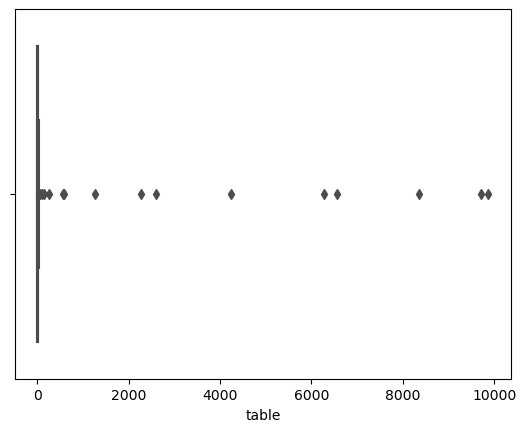

In [18]:
sns.boxplot(data.table.value_counts(),color="red")

In [19]:
data["table"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99,0.999,1]) #outliers after 99%

0.100    55.0
0.200    56.0
0.300    56.0
0.400    57.0
0.500    57.0
0.600    58.0
0.700    58.0
0.800    59.0
0.900    60.0
0.950    61.0
0.970    62.0
0.990    64.0
0.999    67.0
1.000    95.0
Name: table, dtype: float64

In [20]:
min_thresold1=data["table"].quantile(0.999)

In [21]:
data=data[data["table"]<min_thresold1]

<AxesSubplot:xlabel='table'>

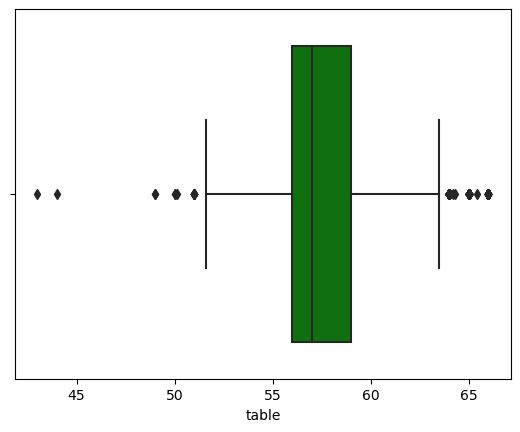

In [22]:
sns.boxplot(data.table,color="green") # no outliers

In [23]:
data["table"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99,1]) #outliers after 99%

0.10    55.0
0.20    56.0
0.30    56.0
0.40    57.0
0.50    57.0
0.60    58.0
0.70    58.0
0.80    59.0
0.90    60.0
0.95    61.0
0.97    62.0
0.99    63.0
1.00    66.0
Name: table, dtype: float64

 #### We can find outliers after 99%

In [24]:
data.shape

(53796, 10)

In [25]:
data.describe()

,carat,depth,table,price,x,y,z
count,53796.000000,53796.000000,53796.000000,53796.000000,53796.000000,53796.000000,53796.000000
mean,0.795359,61.752825,57.437588,3921.976467,5.726795,5.730408,3.536415
std,0.468175,1.418009,2.184381,3976.770923,1.116359,1.137216,0.702295
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5312.250000,6.540000,6.530000,4.030000
max,2.670000,78.200000,66.000000,18823.000000,9.080000,58.900000,31.800000


## ----------------------------------------------------------

### outliers removal in y columns

<AxesSubplot:xlabel='y'>

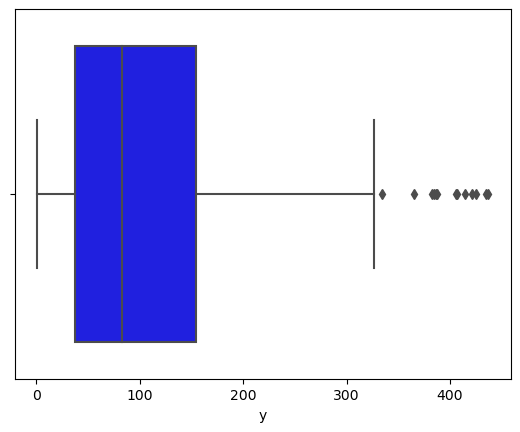

In [26]:
sns.boxplot(data.y.value_counts(),color="blue")

In [27]:
data["y"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.9999,1]) #after 99

0.1000     4.36000
0.2000     4.55000
0.3000     4.83000
0.4000     5.24000
0.5000     5.71000
0.6000     6.08000
0.7000     6.42000
0.8000     6.69000
0.9000     7.30000
0.9500     7.63000
0.9700     8.04000
0.9999     8.91482
1.0000    58.90000
Name: y, dtype: float64

In [28]:
min_thresold2=data["y"].quantile(0.9999)

In [29]:
data=data[data["y"]<min_thresold2]

<AxesSubplot:xlabel='y'>

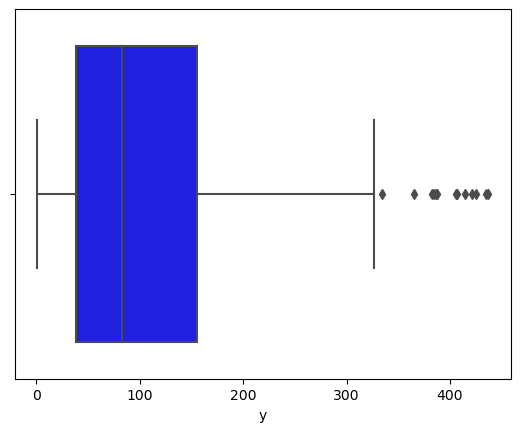

In [30]:
sns.boxplot(data.y.value_counts(),color="blue") 

In [31]:
data["y"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.999,1]) # after 99%

0.100    4.36000
0.200    4.55000
0.300    4.83000
0.400    5.24000
0.500    5.71000
0.600    6.08000
0.700    6.42000
0.800    6.69000
0.900    7.30000
0.950    7.63000
0.970    8.03330
0.999    8.68211
1.000    8.89000
Name: y, dtype: float64

In [32]:
data.shape

(53790, 10)

In [33]:
data.describe()

,carat,depth,table,price,x,y,z
count,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000
mean,0.795212,61.753116,57.437414,3920.878397,5.726518,5.728695,3.536174
std,0.467927,1.417762,2.184262,3975.186766,1.116014,1.107897,0.701873
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.530000,4.030000
max,2.670000,78.200000,66.000000,18823.000000,8.900000,8.890000,31.800000


## ---------------------------------------------------

### Outlier removal in z column =>

<AxesSubplot:xlabel='z'>

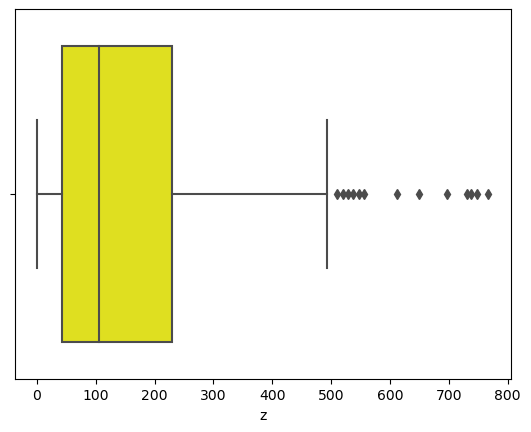

In [34]:
sns.boxplot(data.z.value_counts(),color='yellow')

In [35]:
data["z"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.9999,1]) # after 99%

0.1000     2.690000
0.2000     2.800000
0.3000     2.980000
0.4000     3.220000
0.5000     3.520000
0.6000     3.760000
0.7000     3.980000
0.8000     4.130000
0.9000     4.520000
0.9500     4.720000
0.9700     4.970000
0.9999     5.576211
1.0000    31.800000
Name: z, dtype: float64

In [36]:
min_thresold3=data.z.quantile(0.9999)
data=data[data.z<min_thresold3]

In [37]:
data["z"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.9999,1]) # after 99%

0.1000    2.69
0.2000    2.80
0.3000    2.98
0.4000    3.22
0.5000    3.52
0.6000    3.76
0.7000    3.98
0.8000    4.13
0.9000    4.52
0.9500    4.72
0.9700    4.97
0.9999    5.54
1.0000    5.57
Name: z, dtype: float64

<AxesSubplot:xlabel='z'>

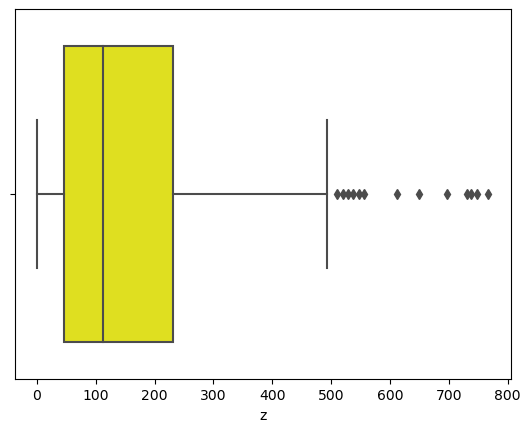

In [38]:
sns.boxplot(data.z.value_counts(),color='yellow')

In [39]:
data.shape

(53784, 10)

In [40]:
data.describe()

,carat,depth,table,price,x,y,z
count,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000,53784.000000
mean,0.795067,61.752640,57.437506,3920.067158,5.726295,5.728476,3.535447
std,0.467690,1.416845,2.184288,3974.230114,1.115803,1.107696,0.690932
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.530000,4.030000
max,2.670000,78.200000,66.000000,18823.000000,8.900000,8.890000,5.570000


## --------------------------------------------------------------------------

# Univariate analysis

In [41]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Calarity-wise viusalisation using bar graph =>

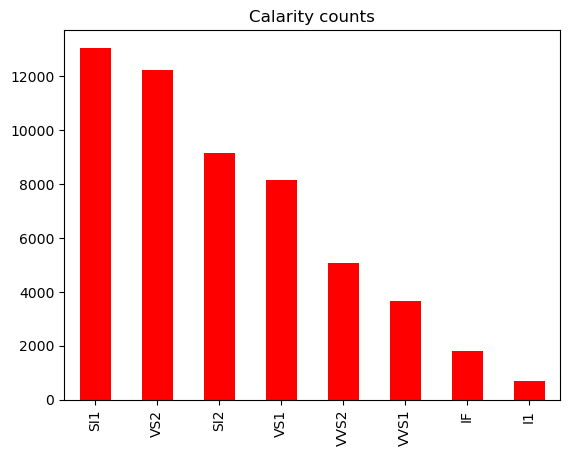

In [42]:
data.clarity.value_counts().plot.bar(color="red")
plt.title("Calarity counts")
plt.show()

### Different color counts present =>

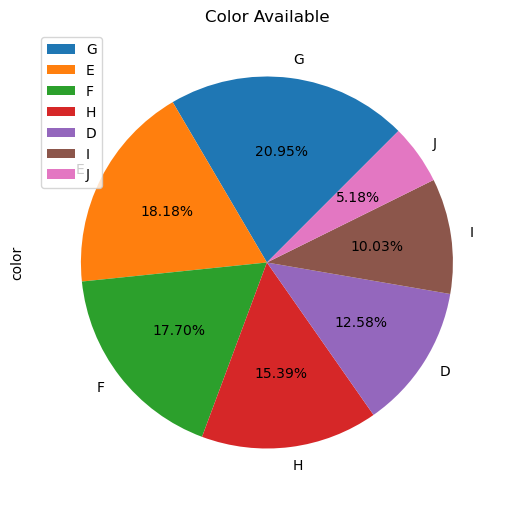

In [43]:
ax=plt.figure(figsize=[6,8])
data["color"].value_counts().plot.pie(autopct = "%.2f%%",startangle=45)
plt.title("Color Available")
plt.legend()

### Price distribution =>

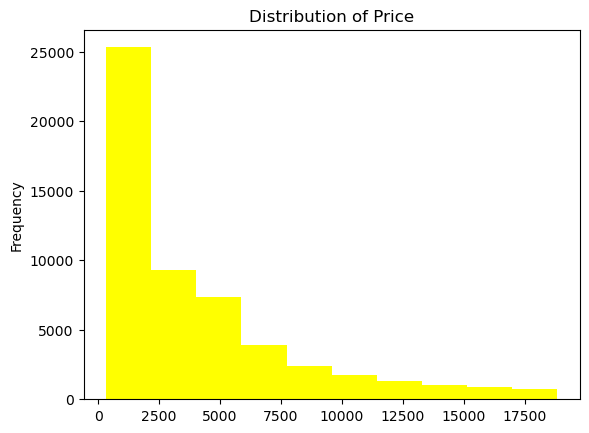

In [44]:
data.price.plot.hist(bins=10,color="yellow")
plt.title("Distribution of Price")
plt.show()

### Carat distribution or Frequency = >

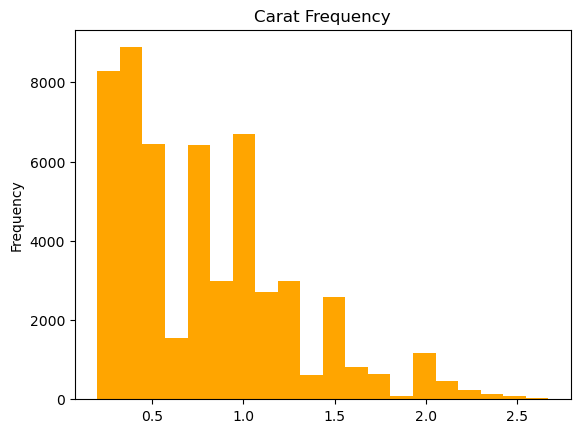

In [45]:
data.carat.plot.hist(bins=20,color="orange")
plt.title("Carat Frequency")
plt.show()

## Bivariate Analysis

### Quality-cut for average value of each carat =>

<AxesSubplot:xlabel='cut'>

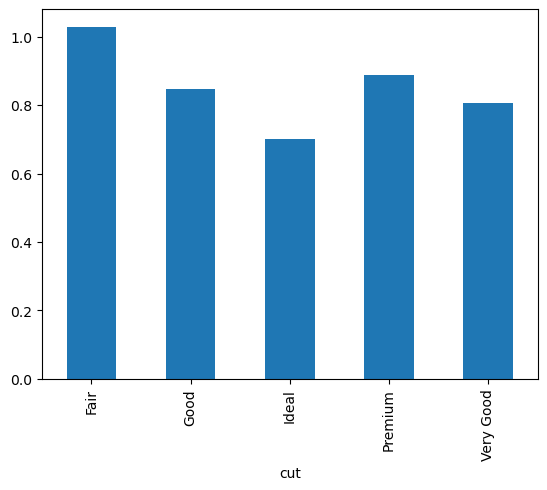

In [46]:
data.groupby('cut').mean()['carat'].plot.bar()

## Multivariate Analysis

### Correlation between data (Higher correlation higer the relation between two variables) =>

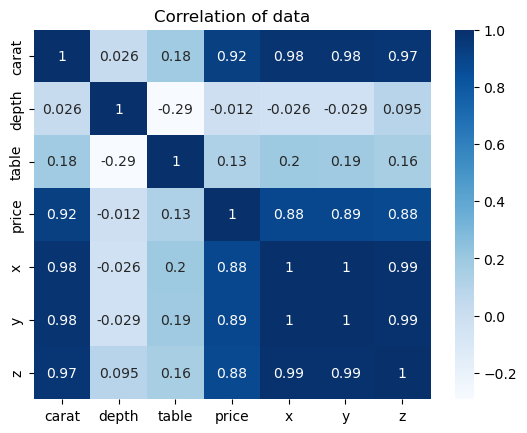

In [47]:
sns.heatmap(data = data.corr(),cmap="Blues",annot=True) 
plt.title("Correlation of data")
plt.show()

### here we can see pr1ice and carat are very much related

In [48]:
# Machine Learning  

In [49]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### WE can see the relation between carat and price which shows some linear relation =>

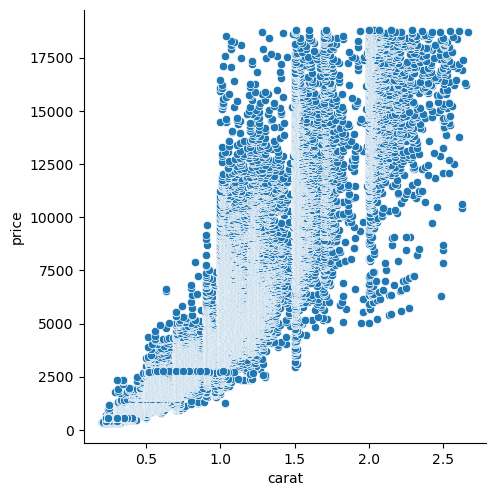

In [50]:
sns.pairplot(data,x_vars =["carat"],y_vars=["price"],kind="scatter",size=5)

In [51]:
data.to_csv('cleaned_data.csv')